==========================================
Bike Sharing Dataset
==========================================

Hadi Fanaee-T

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


=========================================
Background 
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
Data Set
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

=========================================
Associated tasks
=========================================

	- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are 
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


=========================================
Files
=========================================

	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

	
=========================================
Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Goal: To build a prediction model for the hourly utilization “cnt”  

In [113]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'


from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, AdaBoostRegressor,GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.linear_model import Lasso, LassoCV

In [81]:
df_hour = pd.read_csv('../Bike_Sharing/hour.csv')
df_hour.head(25)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [82]:
# We have around 17300 of samples

df_hour.shape

(17379, 17)

In [83]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [84]:
# No missing values. Therefore we dont need any kind of data imputation.

df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [85]:
# The number of unique 'instant' values is equal to the number of samples, therefore, I think that this 
# feature can be neglected for further analysis

len(df_hour.instant.unique())

17379

### EDA

For the sake of simplicity lets ommit time feature.

In [86]:
# Let us drop the 'instant' column, dont really useful for regression purposes

df = df_hour.drop(['instant','dteday'], axis=1)
df.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


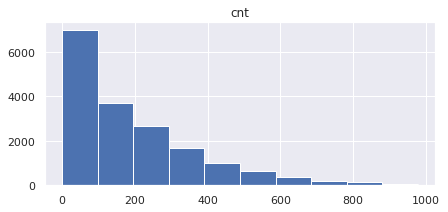

In [87]:
# Lets check underlying distribution of 'cnt' variable

features = ['cnt']
df[features].hist(figsize=(7,3));

In [88]:
Y = df.iloc[:,-1]
X = df.drop([df.columns[-1]], axis=1)

In [92]:
X.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


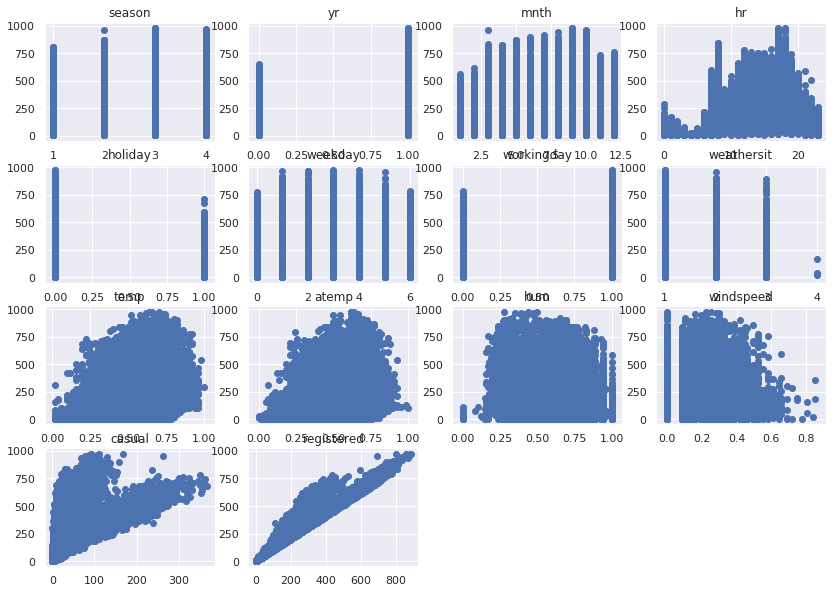

In [95]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(X.columns):
    plt.subplot(4, 4, i + 1)
    plt.scatter(X[col], Y)
    plt.title(col);

Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type of it, most often Gaussian.

In the above plot, we see that the variable `cnt` is prominently skewed right (its tail is longer on the right).

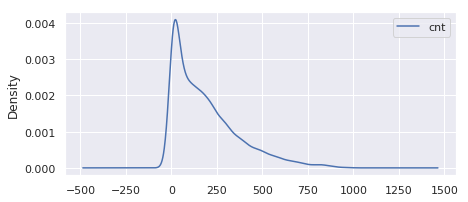

In [96]:
df[features].plot(kind = 'density', subplots = True,
                 sharex = False, figsize = (7,3));

In [97]:
df.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


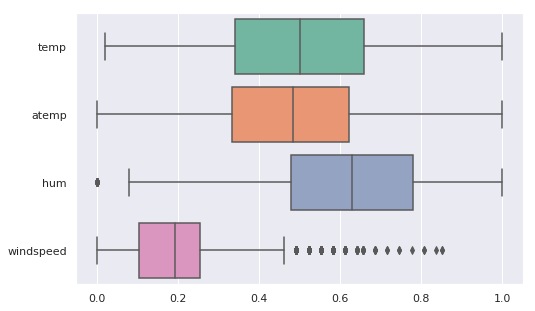

In [98]:
# Outliers. Let us check numerical features for outliers, we will do that with box plots

features = ['temp','atemp','hum','windspeed']

ax = sns.boxplot(data=df[features], orient="h", palette="Set2")

The one can see quite some outliers in `windspeed` feature and a few in `humidity`. We sould check max( values and get rid of outliers.

In [99]:
df.sort_values(by='windspeed', ascending=False).head(20)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4315,3,0,7,17,0,0,0,3,0.80,0.7424,0.49,0.8507,181,177,358
4316,3,0,7,18,0,0,0,3,0.80,0.7424,0.49,0.8507,74,107,181
5635,3,0,8,17,0,6,0,3,0.64,0.5758,0.89,0.8358,2,14,16
9956,1,1,2,21,0,5,1,1,0.42,0.4242,0.35,0.8060,1,151,152
1259,1,0,2,15,0,5,1,1,0.46,0.4545,0.41,0.8060,5,50,55
1017,1,0,2,1,0,2,1,1,0.30,0.2424,0.42,0.7761,0,5,5
1261,1,0,2,17,0,5,1,1,0.32,0.2727,0.49,0.7463,8,181,189
1125,1,0,2,15,0,6,0,1,0.44,0.4394,0.16,0.7463,84,87,171
9653,1,1,2,4,0,0,0,2,0.10,0.0455,0.46,0.7164,0,1,1
11024,2,1,4,12,0,1,1,1,0.54,0.5152,0.28,0.7164,94,186,280


The top-2 values belong to the same day, 5 and 6 am. Maybe there was some extraordinary storm or smth, don't really think that we should clear this column. 

In [100]:
df.sort_values(by='hum', ascending=True).head(10)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1565,1,0,3,16,0,4,1,3,0.42,0.4242,0.0,0.2537,1,20,21
1570,1,0,3,21,0,4,1,3,0.36,0.3485,0.0,0.2239,1,27,28
1568,1,0,3,19,0,4,1,3,0.44,0.4394,0.0,0.5821,5,51,56
1567,1,0,3,18,0,4,1,3,0.44,0.4394,0.0,0.3582,2,80,82
1566,1,0,3,17,0,4,1,2,0.44,0.4394,0.0,0.3881,2,109,111
1564,1,0,3,15,0,4,1,3,0.44,0.4394,0.0,0.2239,3,11,14
1563,1,0,3,14,0,4,1,3,0.44,0.4394,0.0,0.2985,0,12,12
1562,1,0,3,13,0,4,1,3,0.42,0.4242,0.0,0.2239,1,11,12
1561,1,0,3,12,0,4,1,3,0.42,0.4242,0.0,0.2239,4,30,34
1571,1,0,3,22,0,4,1,2,0.34,0.3333,0.0,0.1343,4,30,34


Having `hum` equal to 0 is quite an outlier because the lowest humidity is found in Antarctica where it is so cold all the moisture has frozen out of the air as frost. Therefore we need to count how many such samples do we have. 

In [101]:
df[df['hum'] == 0.0].count()

season        22
yr            22
mnth          22
hr            22
holiday       22
weekday       22
workingday    22
weathersit    22
temp          22
atemp         22
hum           22
windspeed     22
casual        22
registered    22
cnt           22
dtype: int64

So we have only 22 samples out of 18000. We could simply delete these, because some ML models are very sensitive to outliers (i.e SVM) on the other hand if we would have such samples in a test set, deleting such outlier means to lose generalization capacity.

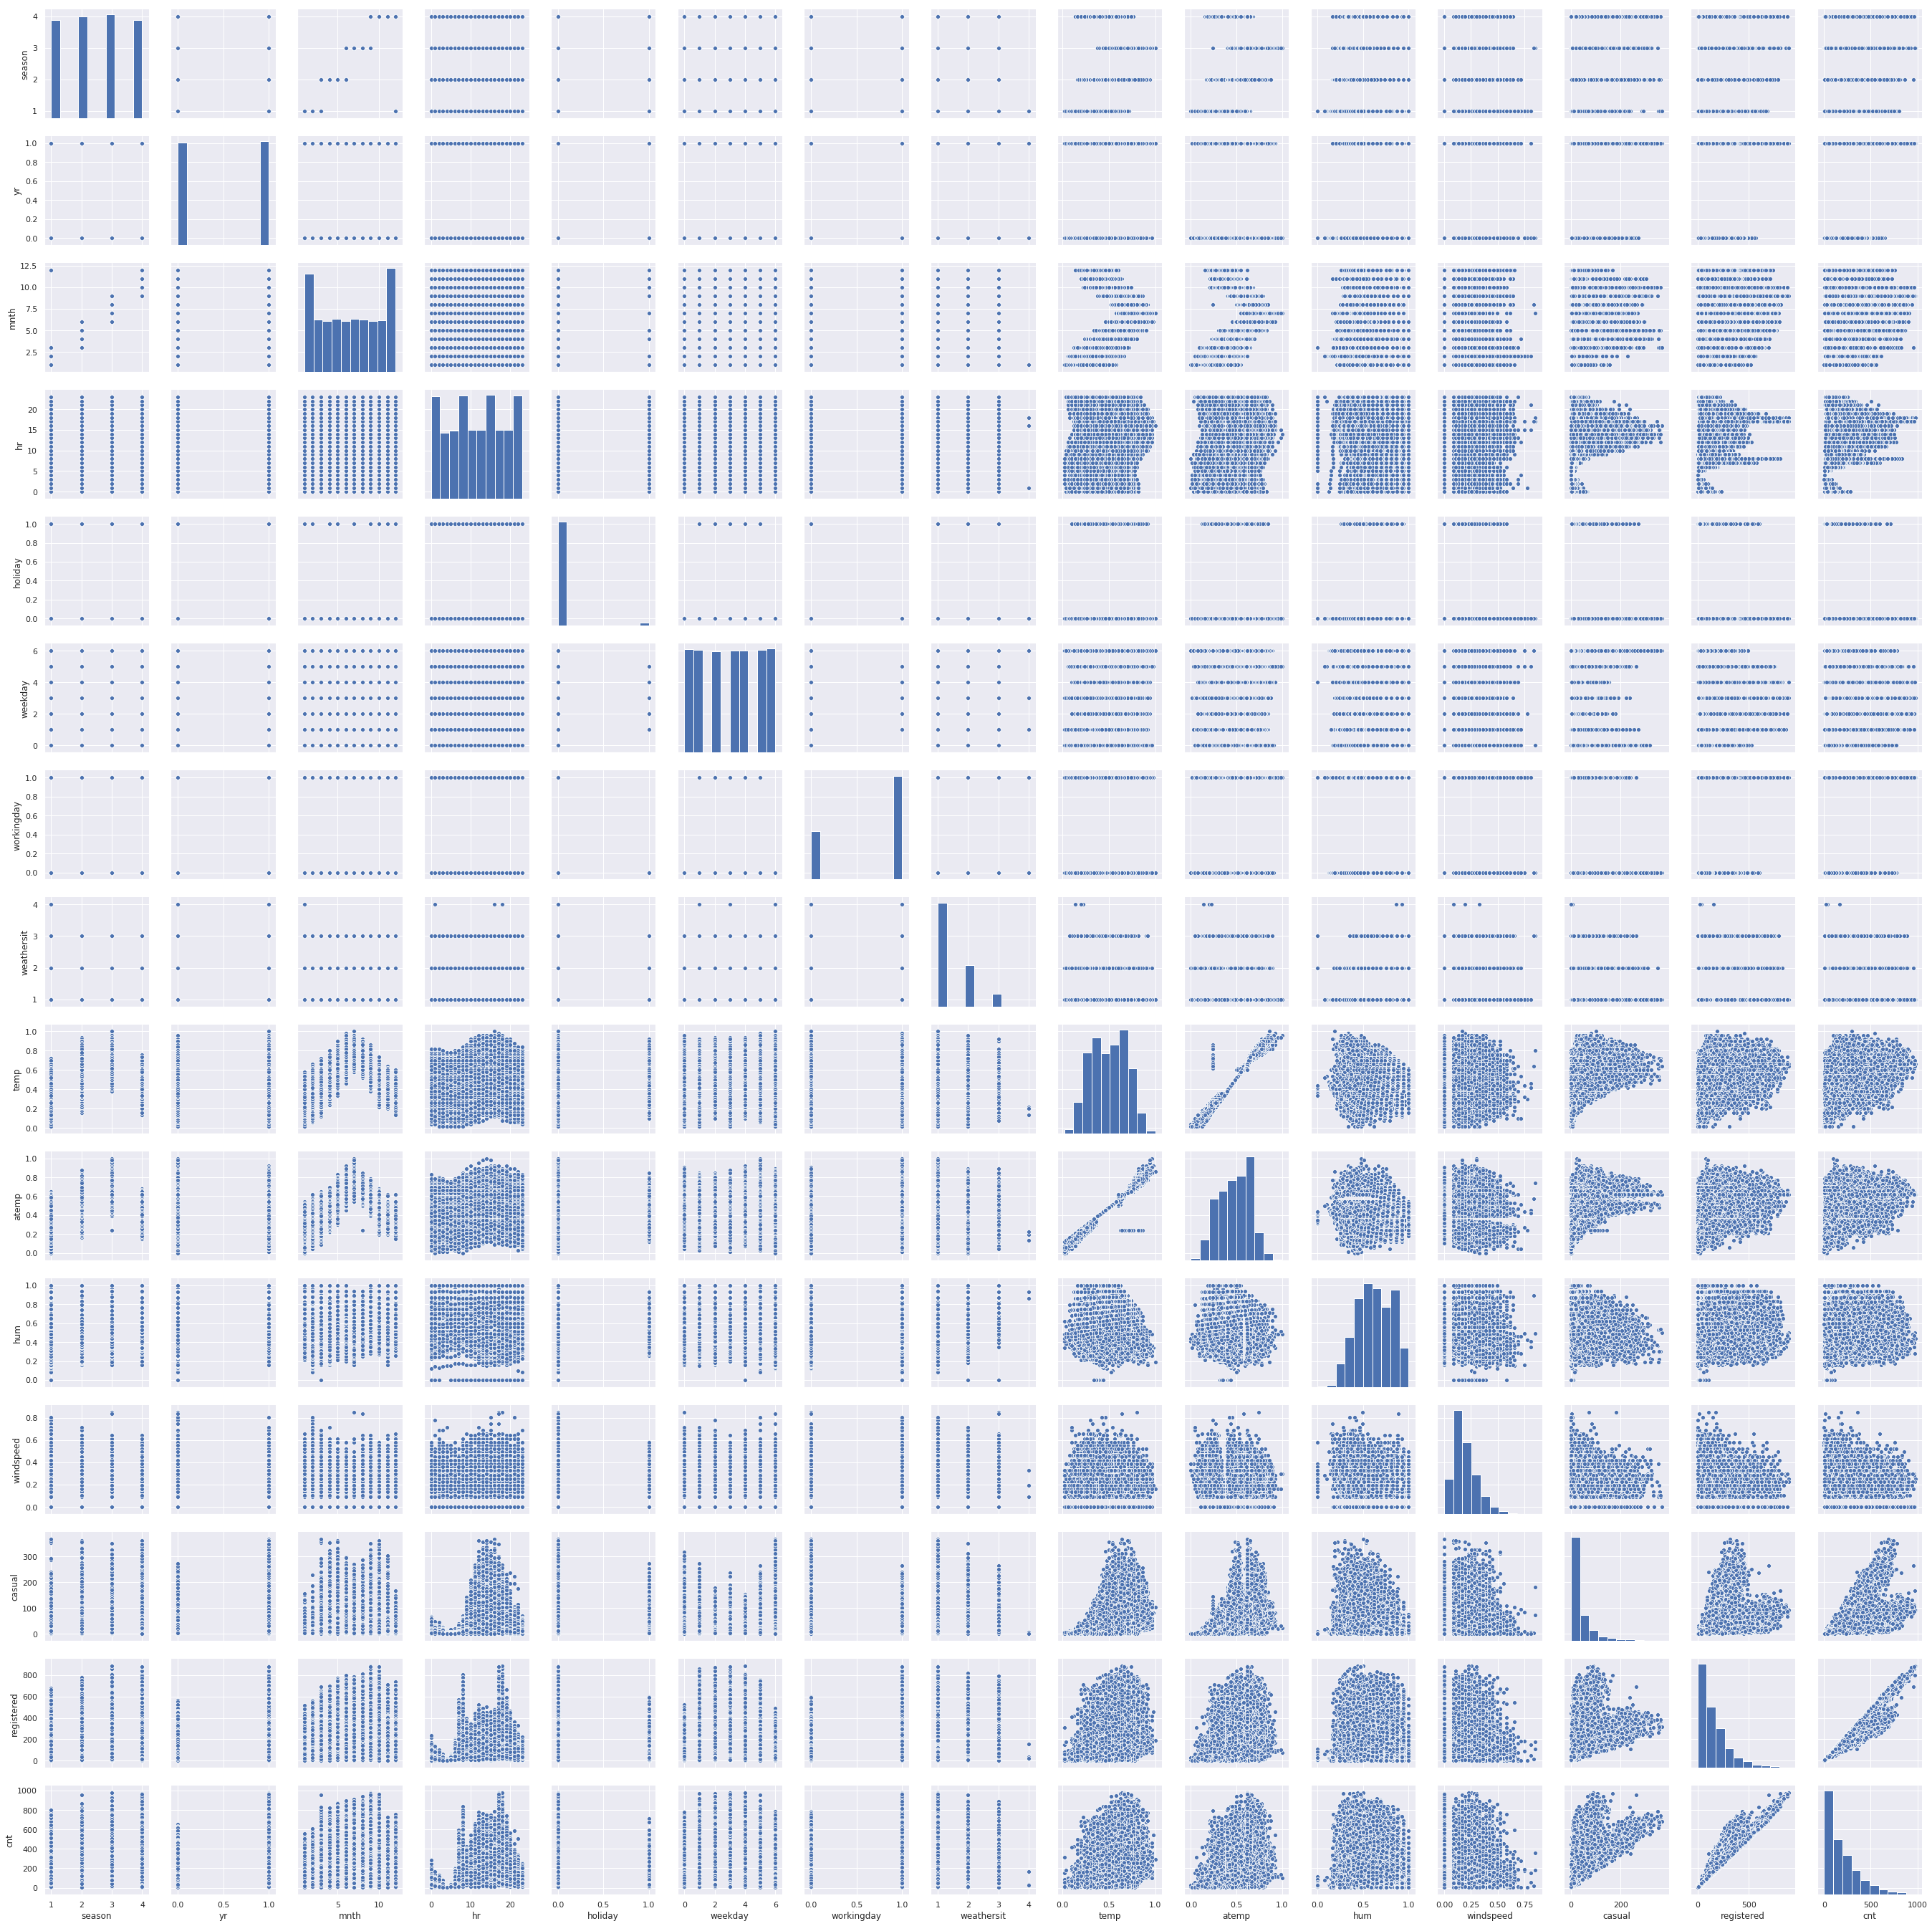

In [102]:
# In some cases, we may want to plot a scatterplot matrix such as the one shown below. 
# Its diagonal contains the distributions of the corresponding variables, and 
# the scatter plots for each pair of variables fill the rest of the matrix.


%config InlineBackend.figure_format = 'png'
sns.pairplot(df_train);

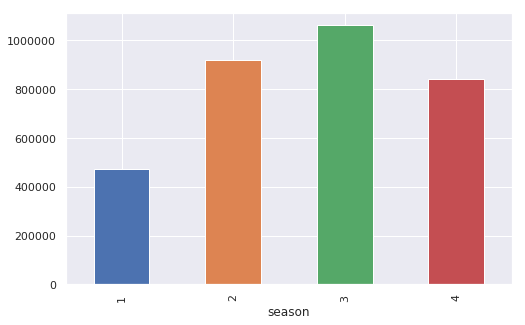

In [103]:
df.groupby(['season'])['cnt'].sum().plot(kind='bar')

In [104]:
df.groupby(['season'])['cnt'].sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

Surprisingly third season - fall, has the most count of total rental bikes. Personally, I would expect summer to be in the first position.

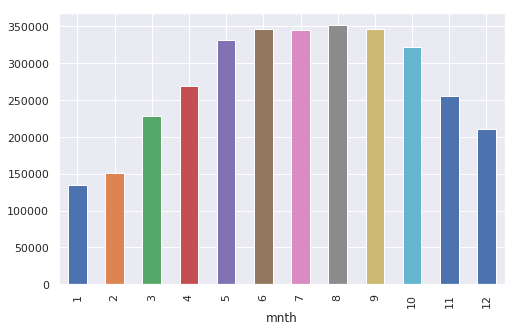

In [105]:
# Distribution over months is oppoite to what we ve observed above

df.groupby(['mnth'])['cnt'].sum().plot(kind='bar')

If we plot the `cnt` values w.r.t months, we see that three summer months have bigger values (expected), than any other months.

In [106]:
# Lets count manually anount of rents in three 'summer' monts

df[df_hour['mnth'].apply(lambda x: (x == 6)|(x == 7)|(x == 8))]['cnt'].sum()

1042484

In [107]:
# Lets count manually anount of rents in three 'sutumn' monts

df[df['mnth'].apply(lambda x: (x == 9)|(x == 10)|(x == 11))]['cnt'].sum()

923174

This result seems to be more realistic.

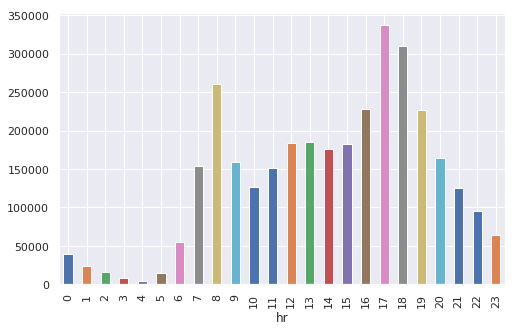

In [108]:
# Now let see the distribution of rental bikes w r t hours

df.groupby(['hr'])['cnt'].sum().plot(kind='bar')

The pattern is pretty clear, very low values at night, than bikes rental starts to grow more or less linearly. Two spikes which can be observed at 8 am and 5 pm, i believe correspond to the time when people go to/from work.

Next is to check how cnt feature relates to weather.
Weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

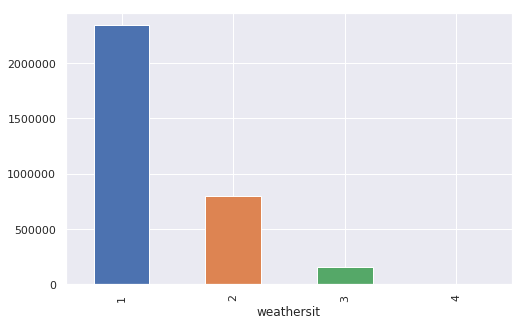

In [109]:
df.groupby(['weathersit'])['cnt'].sum().plot(kind='bar')

As we can see the majority of the people drive bike only when the weather conditions are good. 

In [110]:
# What about holydays and working days

df.groupby(['holiday'])['cnt'].sum()

holiday
0    3214244
1      78435
Name: cnt, dtype: int64

In [111]:
df.groupby(['workingday'])['cnt'].sum()

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64

As we would expect people tend to do rent bikes in working days, to go to/from work. This conncusion is supported by hour observation.


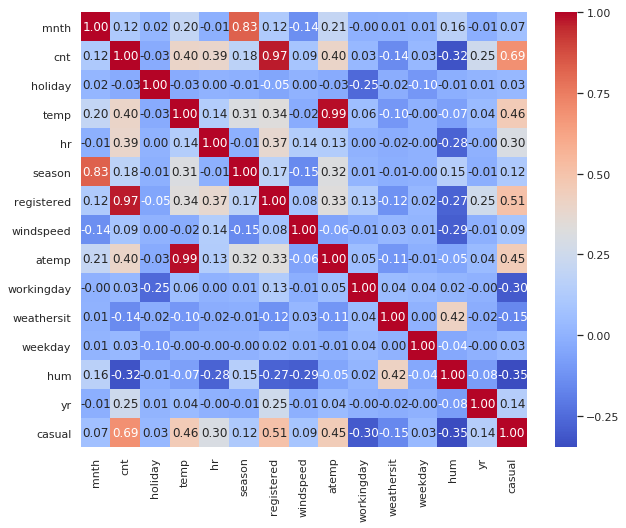

In [112]:
#Lets plot simple correlation matrix

plt.figure(figsize=(10, 8))
numerical = list(set(df.columns))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix,annot=True,fmt = ".2f", cmap = "coolwarm")

The one can see that `cnt` feature is highly correlated with `hrs`, `casual`, `temperature`, of course, `registered` and all other features which represent weather conditions. What is surprising is a weak correlation with `weekday` and `working day`

### Modeling

We going to train some simple ML models. The main question is to choose cost function that would do the best job in describing our model. Since we have outliers in the data and If I wanted to downplay their significance, I would use the MAE since the outlier residuals won't contribute as much to the total error as MSE. The one could argue about R2, but personally, I find it to be the not the ideal metric for assessing regression results, as we are mostly interested in either forecasting or predicting a value, so the error is more useful.

In [115]:
# import some helper 

def rmse(y, p):
    return np.sqrt(mean_squared_error(y, p))

def beatiful_coef(coefs, feature_names=X.columns):
    return pd.DataFrame(coefs, index=feature_names,
                       columns=['coef']).sort_values('coef',
                                                  ascending=False)

In [117]:
def simple_regression_models(df):
    
    
    Y = df.iloc[:,-1]
    X = df.drop([df.columns[-1]], axis=1)

    X_train, X_holdout, y_train, y_holdout = train_test_split(X.values, Y, test_size=0.3,
    random_state=17)    
    
    # Cross validate model with Kfold stratified cross val

    random_state = 17
    
    
    tree = DecisionTreeRegressor(random_state=random_state)
    knn = KNeighborsRegressor(n_neighbors=10)
    forest = RandomForestRegressor(random_state=random_state)
    log_regression = LogisticRegression(random_state = random_state)
    lasso = linear_model.Lasso(random_state = random_state)
    ridge = linear_model.Ridge(random_state = random_state)
    
    
    tree.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    forest.fit(X_train, y_train)
    log_regression.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    
    
    tree_pred = tree.predict(X_holdout)
    knn_pred = knn.predict(X_holdout)
    forest_pred = forest.predict(X_holdout)
    log_regression_pred = log_regression.predict(X_holdout)
    lasso_pred = lasso.predict(X_holdout)
    ridge_pred = ridge.predict(X_holdout)
    
    # MAP
    print(mean_absolute_error(y_holdout, tree_pred), mean_absolute_error(y_holdout, knn_pred), mean_absolute_error(y_holdout, forest_pred), mean_absolute_error(y_holdout, log_regression_pred), mean_absolute_error(y_holdout, lasso_pred), mean_absolute_error(y_holdout, ridge_pred))
    
    # RMSE
    print(rmse(y_holdout, tree_pred), rmse(y_holdout, knn_pred), rmse(y_holdout, forest_pred), rmse(y_holdout, log_regression_pred), rmse(y_holdout, lasso_pred), rmse(y_holdout, ridge_pred))

In [118]:
simple_regression_models(df_train)

(2.507096279248178, 1.3367472190257, 1.403471423091676, 59.98561565017261, 0.012833091948046233, 1.5464393231553085e-06)
(5.275421583220226, 2.494404939673721, 3.374285927954288, 106.91449053044914, 0.01927573311708637, 2.289377344232882e-06)


Results are pretty interesting. Logistic regression just failed without any doubts (we will exclude it from further calculations), but **Lasso** and especially **Ridge** outperformed all other models(I guess due to resistivity for outliers in our data). Anyway, let us test more models: 

In [119]:
random_state = 17

# Modeling step Test different algorithms 
kfold = StratifiedKFold(n_splits=10)

# Cross validate model with Kfold stratified cross val
regressors = []

regressors.append(DecisionTreeRegressor(random_state=random_state))
regressors.append(AdaBoostRegressor(DecisionTreeRegressor(random_state=random_state)))
regressors.append(RandomForestRegressor(random_state=random_state))
regressors.append(ExtraTreesRegressor(random_state=random_state))
regressors.append(GradientBoostingRegressor(random_state=random_state))
regressors.append(BaggingRegressor(random_state=random_state))
regressors.append(KNeighborsRegressor())
regressors.append(LinearSVR(random_state=random_state))
regressors.append(linear_model.Lasso(random_state = random_state))
regressors.append(linear_model.Ridge(random_state = random_state))

In [120]:
%%time

X_train, X_holdout, y_train, y_holdout = train_test_split(X.values, Y, test_size=0.3,
    random_state=17) 


cv_results = []
for regressor in regressors :
    print(regressor)
    cv_results.append(cross_val_score(regressor, X_train, y = y_train, scoring = "neg_median_absolute_error", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=17, splitter='best')
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=17, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_we

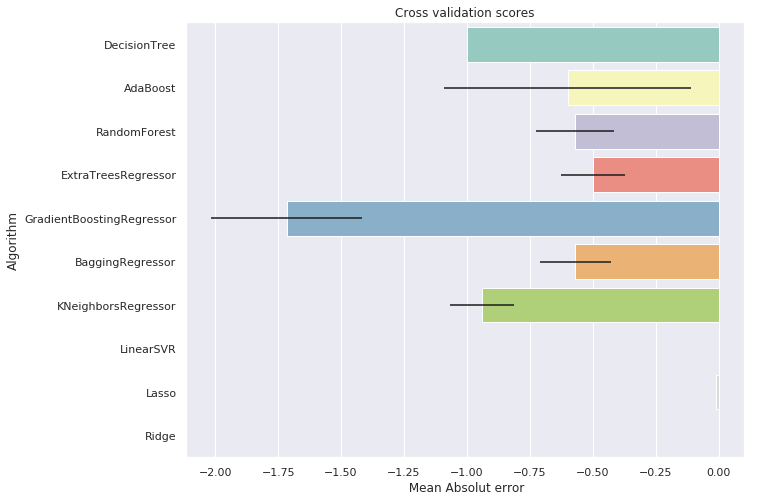

In [121]:
import seaborn as sns

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost",
"RandomForest","ExtraTreesRegressor","GradientBoostingRegressor","BaggingRegressor","KNeighborsRegressor","LinearSVR","Lasso","Ridge"]})
plt.figure(figsize=(10, 8))
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel(" Mean Absolut error")
g = g.set_title("Cross validation scores")

Well, the results pretty much repeat what we had above, and it makes sense to process further with: Lasso, Ridge and SVR.

#### Hyperparameter tuning

In [122]:
# Lasso Regression. LassoCV classcan also be used unstead of GridSearchCV, bith give 
# the same result.

Lasso = linear_model.Lasso()
n_alphas  = 500
lasso_param_grid = {
              "alpha" :np.linspace(1e-6, 10, n_alphas)
        }

gsLasso = GridSearchCV(Lasso,param_grid = lasso_param_grid, cv=kfold, scoring="neg_median_absolute_error", n_jobs= -1, verbose = 1)

gsLasso.fit(X_train,y_train)

lasso_best = gsLasso.best_estimator_
lasso_pred = gsLasso.predict(X_holdout)

print(gsLasso.best_score_)
print(gsLasso.best_params_)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  4.2min


-1.830397192570928e-05
{'alpha': 1e-06}


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  4.2min finished
/upb/users/s/ssmirnov/profiles/unix/imt/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [123]:
# MSE with HP optimization (very small)

abs(cross_val_score(linear_model.Lasso(1e-06), X_train, y_train, cv=kfold, 
                        scoring='neg_mean_squared_error').mean())

1.352294573584751e-09

In [124]:
# MSE with HP optimization (quite big)

abs(cross_val_score(linear_model.Lasso(10), X_train, y_train, cv=kfold, 
                        scoring='neg_mean_squared_error').mean())

0.041510150595889

In [125]:
# Check perfomance on the test set


print(mean_absolute_error(lasso_pred, y_holdoutoldout), rmse(lasso_pred, y_holdout))

(2.2183824931206435e-05, 3.159535392271406e-05)


In [126]:
# Ridge Regression

Ridge = linear_model.Ridge()
n_alphas  = 500
ridge_param_grid = {
              "alpha" :np.linspace(1e-6, 10, n_alphas)
        }

gsRidge = GridSearchCV(Ridge,param_grid = ridge_param_grid, cv=kfold, scoring="neg_median_absolute_error", n_jobs= -1, verbose = 1)

gsRidge.fit(X_train,y_train)

ridge_best = gsRidge.best_estimator_
ridge_pred = gsRidge.predict(X_holdout)


print(gsRidge.best_score_)
print(gsRidge.best_params_)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 2524 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 4624 tasks      | elapsed:  1.2min


-1.2205943247959126e-12
{'alpha': 1e-06}


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.2min finished


In [130]:
# MSE with HP optimization (very small)

abs(cross_val_score(linear_model.Ridge(1e-06), X_train, y_train, cv=kfold, 
                        scoring='neg_mean_squared_error').mean())

6.5031373103828306e-24

In [131]:
# MSE with HP optimization (quite big)

abs(cross_val_score(linear_model.Ridge(10), X_train, y_train, cv=kfold, 
                        scoring='neg_mean_squared_error').mean())

6.331202872960498e-10

In [132]:
# Check perfomance on the test set

print(mean_absolute_error(ridge_pred, y_holdout), rmse(ridge_pred, y_holdout))

(1.5594178976291245e-12, 2.311910446135567e-12)


In [133]:
# SVR

SVR = LinearSVR()

svr_param_grid = {
              "loss" :['epsilon_insensitive','squared_epsilon_insensitive'],
              "C":  [0.01, 0.1, 1, 10,50,100],
             "epsilon":  [0.01, 0.1, 1, 5,10],}

gsSVR = GridSearchCV(SVR,param_grid = svr_param_grid, cv=kfold, scoring="neg_median_absolute_error", n_jobs= -1, verbose = 1)

gsSVR.fit(X_train,y_train)

svr_best = gsSVR.best_estimator_
svr_pred = gsSVR.predict(X_holdout)

print(gsSVR.best_score_)
print(gsSVR.best_params_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.7min finished
/upb/users/s/ssmirnov/profiles/unix/imt/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


-0.004010911283202725
{'epsilon': 0.01, 'C': 10, 'loss': 'squared_epsilon_insensitive'}


In [135]:
print(mean_absolute_error(lasso_pred, y_holdout), rmse(lasso_pred, y_holdout))
print(mean_absolute_error(ridge_pred, y_holdout), rmse(ridge_pred, y_holdout))
print(mean_absolute_error(svr_pred, y_holdout), rmse(svr_pred, y_holdout))

(2.2183824931206435e-05, 3.159535392271406e-05)
(1.5594178976291245e-12, 2.311910446135567e-12)
(0.00475876622718159, 0.005401854538466969)


**Conclusion**: In this work, we briefly faced a task of Bike sharing prediction. Due to the continuous nature of the target variables, the task is labeled as regression one. In the first part **EDA** dataset was briefly analyzed in order to have a glimpse for a simple pattern that can be observed from data. Than in **Modeling** part we have tested different regression algorithms, which resulted in three best fits for us: Ridge, Lasso SVR. The lowest error was shown by Ridge Regressor.